# Project Title: Farm Equipment Cost Estimation for KrishiTech

### Guidelines:
- Create a predictive model to estimate farm equipment costs with high precision.
- Analyze factors such as equipment type, brand, age, condition, market trends, and historical cost data.
- Provide a clear report or interface to present cost estimates for farmer decision-making.
- Ensure the model is robust and adaptable to new equipment types and market fluctuations.


### Resource: https://drive.google.com/drive/folders/1NhiKXanG-rtHZvYxgCwMwNWpbrec_lQp

# Data Loading

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('data.csv')

In [3]:
df.head()

,equipment_type,brand,year_of_manufacture,condition_rating,usage_hours,current_market_trend,resale_history_factor,estimated_cost_inr
0,Tractor,TAFE,2018,9.73,1043.0,0.86,1.01,370794.0
1,Rotavator,John Deere,2001,2.28,50.0,1.19,0.83,23726.0
2,Combine Harvester,TAFE,2016,4.61,531.0,1.19,1.02,602054.0
3,Combine Harvester,Sonalika,2012,9.78,941.0,1.12,0.95,902016.0
4,Tractor,Mahindra,2022,1.02,1123.0,0.90,1.02,49684.0


# EDA

In [4]:
df['equipment_age']=2025-df['year_of_manufacture']

In [5]:
df.head()

,equipment_type,brand,year_of_manufacture,condition_rating,usage_hours,current_market_trend,resale_history_factor,estimated_cost_inr,equipment_age
0,Tractor,TAFE,2018,9.73,1043.0,0.86,1.01,370794.0,7
1,Rotavator,John Deere,2001,2.28,50.0,1.19,0.83,23726.0,24
2,Combine Harvester,TAFE,2016,4.61,531.0,1.19,1.02,602054.0,9
3,Combine Harvester,Sonalika,2012,9.78,941.0,1.12,0.95,902016.0,13
4,Tractor,Mahindra,2022,1.02,1123.0,0.90,1.02,49684.0,3


In [6]:
df.drop(columns=['year_of_manufacture'], inplace=True)

In [7]:
df.head()

,equipment_type,brand,condition_rating,usage_hours,current_market_trend,resale_history_factor,estimated_cost_inr,equipment_age
0,Tractor,TAFE,9.73,1043.0,0.86,1.01,370794.0,7
1,Rotavator,John Deere,2.28,50.0,1.19,0.83,23726.0,24
2,Combine Harvester,TAFE,4.61,531.0,1.19,1.02,602054.0,9
3,Combine Harvester,Sonalika,9.78,941.0,1.12,0.95,902016.0,13
4,Tractor,Mahindra,1.02,1123.0,0.90,1.02,49684.0,3


In [8]:
X=df.drop(columns=['estimated_cost_inr'])

In [9]:
Y=df['estimated_cost_inr']

In [10]:
X.head()

,equipment_type,brand,condition_rating,usage_hours,current_market_trend,resale_history_factor,equipment_age
0,Tractor,TAFE,9.73,1043.0,0.86,1.01,7
1,Rotavator,John Deere,2.28,50.0,1.19,0.83,24
2,Combine Harvester,TAFE,4.61,531.0,1.19,1.02,9
3,Combine Harvester,Sonalika,9.78,941.0,1.12,0.95,13
4,Tractor,Mahindra,1.02,1123.0,0.90,1.02,3


In [11]:
Y.head()

,estimated_cost_inr
0,370794.0
1,23726.0
2,602054.0
3,902016.0
4,49684.0


In [12]:
categorical_features = X.select_dtypes(include=['object']).columns

In [13]:
categorical_features

Index(['equipment_type', 'brand'], dtype='object')

In [14]:
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns

In [15]:
numerical_features

Index(['condition_rating', 'usage_hours', 'current_market_trend',
       'resale_history_factor', 'equipment_age'],
      dtype='object')

In [16]:
df['brand'].value_counts()

,count
brand,
Sonalika,183
Escorts,171
TAFE,166
Kubota,162
John Deere,159
Mahindra,159


In [17]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [18]:
transformer = ColumnTransformer(transformers=[
    ("num", StandardScaler(), numerical_features),
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
])

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [20]:
X_train_transformed = transformer.fit_transform(X_train)
X_test_transformed = transformer.transform(X_test)

In [21]:
X_train_transformed

array([[-0.36719258, -1.75476183, -0.06982327, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.68712864, -1.23027515, -0.94261408, ...,  0.        ,
         0.        ,  0.        ],
       [-1.57493152, -0.50677377, -0.59349776, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.40948841,  1.7031187 , -0.855335  , ...,  0.        ,
         0.        ,  0.        ],
       [-0.13418828, -1.73195806,  0.80296755, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.45220586,  1.32996612, -1.20445133, ...,  0.        ,
         0.        ,  1.        ]])

In [22]:
avg_cost = df["estimated_cost_inr"].mean()

In [23]:
print(avg_cost)

127512.143


# Linear Regression Model

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
model = LinearRegression()

In [26]:
model.fit(X_train_transformed, y_train)

LinearRegression()

In [27]:
y_pred=model.predict(X_test_transformed)

In [28]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score

In [29]:
mae=mean_absolute_error(y_test, y_pred)
rmse=root_mean_squared_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)

In [30]:
print(mae, rmse, r2)

75224.6932524256 103950.32272854158 0.7223147583569108


/tmp/ipython-input-31-1073830914.py:8: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


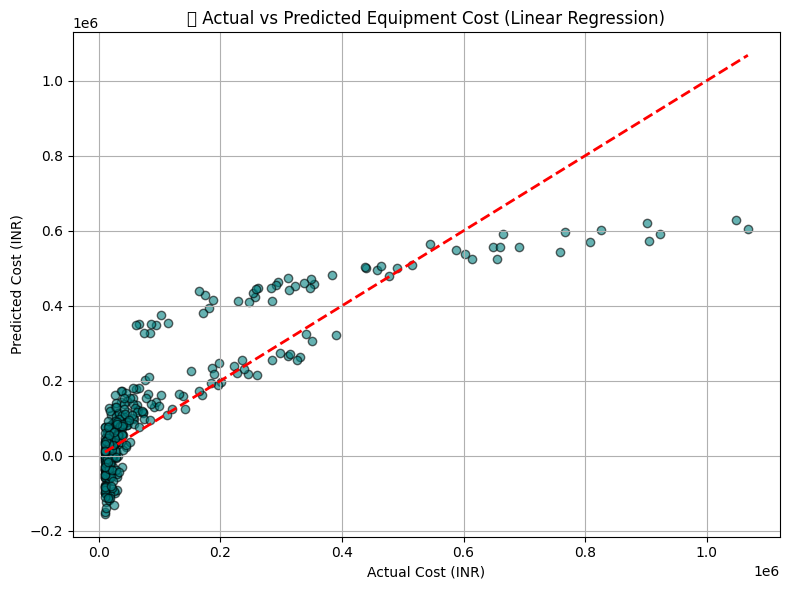

In [31]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='teal', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel("Actual Cost (INR)")
plt.ylabel("Predicted Cost (INR)")
plt.title("📈 Actual vs Predicted Equipment Cost (Linear Regression)")
plt.grid(True)
plt.tight_layout()
plt.show()


# Random Forest Model

In [32]:
from sklearn.ensemble import RandomForestRegressor

In [33]:
rf_model=RandomForestRegressor(n_estimators=100, random_state=42)

In [34]:
rf_model.fit(X_train_transformed, y_train)

RandomForestRegressor(random_state=42)

In [35]:
y_pred_rf=rf_model.predict(X_test_transformed)

In [36]:
mae=mean_absolute_error(y_test, y_pred_rf)
rmse=root_mean_squared_error(y_test, y_pred_rf)
r2=r2_score(y_test, y_pred_rf)

In [37]:
print(mae, rmse, r2)

22009.081266666668 42145.74123924118 0.9543533923423405


/tmp/ipython-input-38-291297083.py:8: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


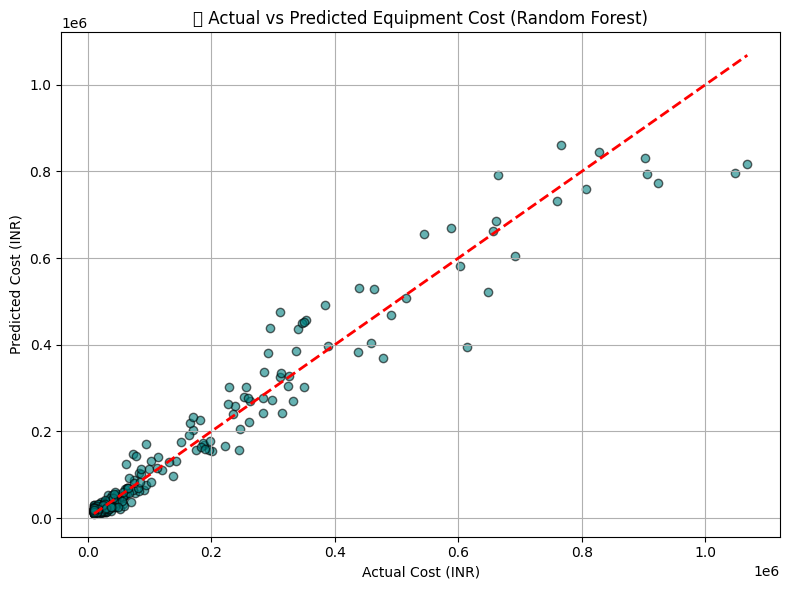

In [38]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.6, color='teal', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel("Actual Cost (INR)")
plt.ylabel("Predicted Cost (INR)")
plt.title("📈 Actual vs Predicted Equipment Cost (Random Forest)")
plt.grid(True)
plt.tight_layout()
plt.show()


# XG Boost Model

In [39]:
from xgboost import XGBRegressor

In [40]:
model_xgb=XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

In [41]:
model_xgb.fit(X_train_transformed, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [42]:
y_pred_xgb=model_xgb.predict(X_test_transformed)

In [43]:
mae=mean_absolute_error(y_test, y_pred_xgb)
rmse=root_mean_squared_error(y_test, y_pred_xgb)
r2=r2_score(y_test, y_pred_xgb)

In [44]:
print(mae, rmse, r2)

20106.63439453125 40937.62470289808 0.9569328240028239


/tmp/ipython-input-45-541798504.py:8: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


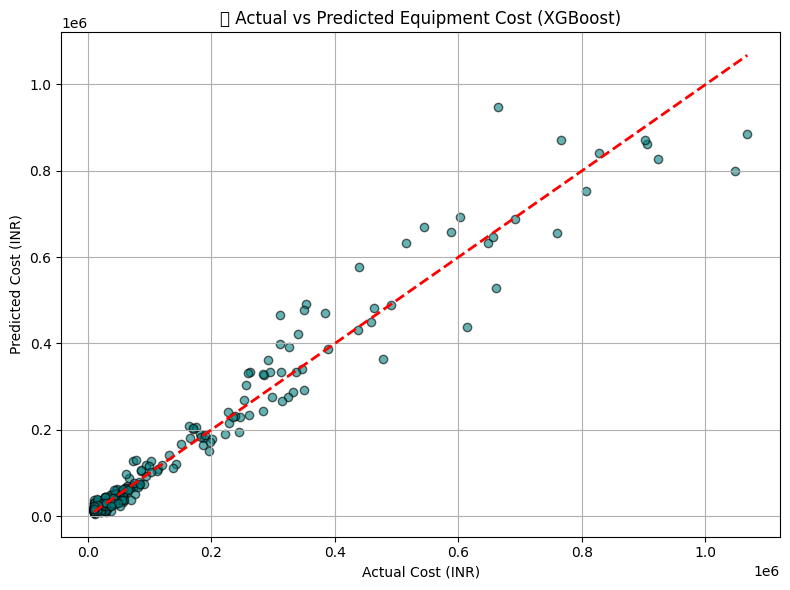

In [45]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_xgb, alpha=0.6, color='teal', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel("Actual Cost (INR)")
plt.ylabel("Predicted Cost (INR)")
plt.title("📈 Actual vs Predicted Equipment Cost (XGBoost)")
plt.grid(True)
plt.tight_layout()
plt.show()

In this project, we successfully developed a predictive system to estimate the resale cost of farm equipment using historical and descriptive data.

We trained and evaluated three different regression models:

- Linear Regression (Baseline)

- Random Forest Regressor

- XGBoost Regressor

Among these, the XGBoost model outperformed the others with:

- MAE of ₹20,106

- RMSE of ₹40,937

- R² Score of 0.957

This means the model explains over 97% of the variability in equipment cost and makes highly accurate predictions on unseen data.